<a href="https://colab.research.google.com/github/llohar/Deep-learning/blob/main/Intro_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
print(tf.__version__)

2.8.2


In [1]:
def load_dataset():
    train_dataset = h5py.File('/content/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('/content/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y


def predict(X, parameters):
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}
    
    x = tf.placeholder("float", [12288, 1])
    
    z3 = forward_propagation_for_predict(x, params)
    p = tf.argmax(z3)
    
    sess = tf.Session()
    prediction = sess.run(p, feed_dict = {x: X})
        
    return prediction

def forward_propagation_for_predict(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters
    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3'] 
                                                           # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                     # Z3 = np.dot(W3,Z2) + b3
    
    return Z3

In [28]:
import numpy as np 
import pandas as pd
import math
import h5py
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops


In [ ]:
tf.disable_v2_behavior()

In [4]:
# matplotlib inline
print(np.random.seed())

None


In [29]:
# computing loss using tf
y_hat = tf.constant(36,name='y_hat')
y = tf.constant(39,name='y')

loss =tf.Variable((y_hat-y)**2,name='loss')

# when init is run later
init = tf.compat.v1.global_variables_initializer()

with tf.compat.v1.Session() as session: # create a seesion and run the output
  session.run(init)           # initializes the variables
  print(session.run(loss))    # print the loss


9


In [6]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a,b)
print(c)

Tensor("Mul:0", shape=(), dtype=int32)


In [7]:
session = tf.Session()
print(session.run(c))

20


In [8]:
# placeholder: change the value of x in the feed_dict
x = tf.placeholder(tf.int64,name='x')
print(session.run(2*x,feed_dict={x:3}))
session.close


6


<bound method BaseSession.close of <tensorflow.python.client.session.Session object at 0x7fd094fdcf10>>

In [33]:
# Linear Function
def linear_function():
  X = tf.constant(np.random.randn(3,1),name='X')
  W = tf.constant(np.random.randn(4,3),name='W')
  b = tf.constant(np.random.randn(4,1),name='b')
  Y = tf.add(tf.matmul(W,X),b)

  session = tf.compat.v1.Session()
  result = session.run(Y)
  session.close

  return result


In [34]:
print("result = "+str(linear_function()))

result = [[ 0.72455373]
 [-1.25678018]
 [-6.01989151]
 [-2.88914678]]


In [37]:
# sigmoid function
def sigmoid(z):
  x = tf.compat.v1.placeholder(tf.float32,name='x')
  sigmoid = tf.sigmoid(x)

  with tf.compat.v1.Session() as session:
    result = session.run(sigmoid,feed_dict ={x:z})
  return result


In [38]:
print(sigmoid(2))

0.8807971


In [39]:
## cost function
def cost(logits,labels):
  z = tf.compat.v1.placeholder(tf.float32,name='z')
  y = tf.compat.v1.placeholder(tf.float32,name='y')
  cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z,labels=y)
  sess = tf.compat.v1.Session()
  cost = sess.run(cost,feed_dict={z:logits,y:labels})
  sess.close()
  return cost

In [40]:
print(cost(5,4))

-14.993284


In [41]:
# one-hot encoding
def one_hot_matrix(labels,C):
  C = tf.constant(C,name='C')
  one_hot_matrix = tf.one_hot(labels,C,axis=0)
  sess = tf.compat.v1.Session()
  one_hot = sess.run(one_hot_matrix)
  sess.close()
  return one_hot



In [42]:
print(one_hot_matrix(3,5))

[0. 0. 0. 1. 0.]


In [44]:
# ones
def ones(shape):
  ones = tf.ones(shape)
  sess = tf.compat.v1.Session()
  ones = sess.run(ones)
  sess.close()
  return ones
print(ones((5,4)))

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [45]:
# signs dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes=load_dataset()

y= 5


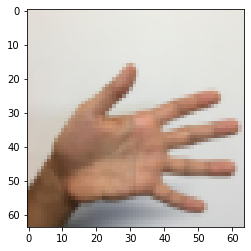

In [46]:
# Example of a pic
index = 0 
plt.imshow(X_train_orig[index])
print("y= "+str(np.squeeze(Y_train_orig[:,index])))


In [47]:
print(Y_train_orig.shape)

(1, 1080)


In [48]:
# Flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0],-1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0],-1).T
# Normalize Image vector
X_train = X_train_flatten/255
X_test = X_test_flatten/255
# convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig,6)
Y_test = convert_to_one_hot(Y_test_orig,6)

print("Number of training examples :" + str(X_train.shape[1]))
print("Number of test examples :" + str(X_test.shape[1]))
print("X_train shape :" + str(X_train.shape))
print("X_test shape :" + str(X_test.shape))
print("Y_train shape :" + str(Y_train.shape))
print("Y_test shape :" + str(Y_test.shape))





Number of training examples :1080
Number of test examples :120
X_train shape :(12288, 1080)
X_test shape :(12288, 120)
Y_train shape :(6, 1080)
Y_test shape :(6, 120)


In [49]:
# Create placeholder
def create_placeholder(n_x,n_y):
  X = tf.compat.v1.placeholder(tf.float32,[n_x,None],name='X')
  Y = tf.compat.v1.placeholder(tf.float32,[n_y,None],name='Y')
  return X,Y

X,Y = create_placeholder(12288,6)
print('x :'+str(X))
print('Y :'+str(Y))

x :Tensor("X_5:0", shape=(12288, ?), dtype=float32)
Y :Tensor("Y_3:0", shape=(6, ?), dtype=float32)


In [61]:
# initialize parameters
def initialize_parameters():
  tf.compat.v1.set_random_seed(1)
  W1 = tf.compat.v1.get_variable('W1',[25,12288],initializer=tf.initializers.GlorotUniform())
  b1 = tf.compat.v1.get_variable('b1',[25,1],initializer=tf.zeros_initializer())
  W2 = tf.compat.v1.get_variable('W2',[12,25],initializer=tf.initializers.GlorotUniform())
  b2 = tf.compat.v1.get_variable('b2',[12,1],initializer=tf.zeros_initializer())
  W3 = tf.compat.v1.get_variable('W3',[6,12],initializer= tf.initializers.GlorotUniform())
  b3 = tf.compat.v1.get_variable('b3',[6,1],initializer=tf.zeros_initializer())

  parameters = {"W1":W1,
                "b1":b1,
                "W2":W2,
                "b2":b2,
                "W3":W3,
                "b3":b3}

  return parameters

  tf.reset_default_graph()

  with tf.Session as sess:
    parameters = initialize_parameters()

    print('W1'+str(parameters["W1"]))
    print('b1'+str(parameters["b1"]))
    print('W2'+str(parameters["W2"]))
    print('b2'+str(parameters["b2"]))









In [62]:
# forward_propagation
def forward_propagation(X,parameters):
  W1 = parameters['W1']
  b1 = parameters['b1']
  W2 = parameters['W2']
  b2 = parameters['b2']
  W3 = parameters['W3']
  b3 = parameters['b3']
  Z1 = tf.add(tf.matmul(W1,X),b1)
  A1 = tf.nn.relu(Z1)
  Z2 = tf.add(tf.matmul(W2,A1),b2)
  A2 = tf.nn.relu(Z2)
  Z3 = tf.add(tf.matmul(W3,A2),b3)
  return Z3




In [63]:
tf.compat.v1.reset_default_graph()

with tf.compat.v1.Session() as sess:
  X,Y = create_placeholder(12288,6)
  parameters = initialize_parameters()
  Z3 = forward_propagation(X,parameters)
  print('Z3'+str(Z3))

Z3Tensor("Add_2:0", shape=(6, ?), dtype=float32)


In [65]:
# cost function
def compute_cost(Z3,Y):
  logits = tf.transpose(Z3)
  labels = tf.transpose(Y)
  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))
  return cost

In [68]:
tf.compat.v1.reset_default_graph()

with tf.compat.v1.Session() as sess:
  X,Y = create_placeholder(12288,6)
  parameters  = initialize_parameters()
  Z3 = forward_propagation(X,parameters)
  cost = compute_cost(Z3,Y)
  print("Z3 = "+str(cost))
  

Z3 = Tensor("Mean:0", shape=(), dtype=float32)
